# Prosper Loan Data Analysis
## by Furkan Küçük

## Investigation Overview

In this work, I tried to discover the correlations between Prosper Rating and other factors like income level, credibility, house ownership. I also tried to discover customer behaviors with loan status.

## Dataset Overview

Dataset is provided by Prosper and can be found at: https://s3.amazonaws.com/udacity-hosted-downloads/ud651/prosperLoanData.csv.

Variable explainations can be found at: https://docs.google.com/spreadsheets/d/1gDyi_L4UvIrLTEC6Wri5nbaMmkGmLQBk-Yx3z0XDEtI/edit#gid=0.

Preliminary exploration shows that:
- Data contains 113937 samples with 81 columns. (76216 entries and 69 columns after cleaning)
- The data we want to invesitage is:
    - Loan status
    - Prosper Rating
    - Borrower APR
- Features mentioned above may be correlated, or being constructed by other features which may be:
    - Income Range
    - Verifiable Income
    - Ownership of house
    - Employment status

In [35]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [36]:
# load in the dataset into a pandas dataframe
df = pd.read_csv("prosperLoanData.csv")

df = df.convert_dtypes()
columns_to_drop = (df.isna().sum() > len(df)*7/10) == True
df = df.drop(columns=columns_to_drop[columns_to_drop == True].keys())
df.drop(columns="ClosedDate", inplace=True)

df = df.dropna()
loan_status = pd.Categorical(df.LoanStatus)

## Overdue Customer Behavior

We found out that over 70% of the customers completed their loan payments, in their final payment progress etc. Among the overdue customers, most of them tend to make their payments within 15 days. 

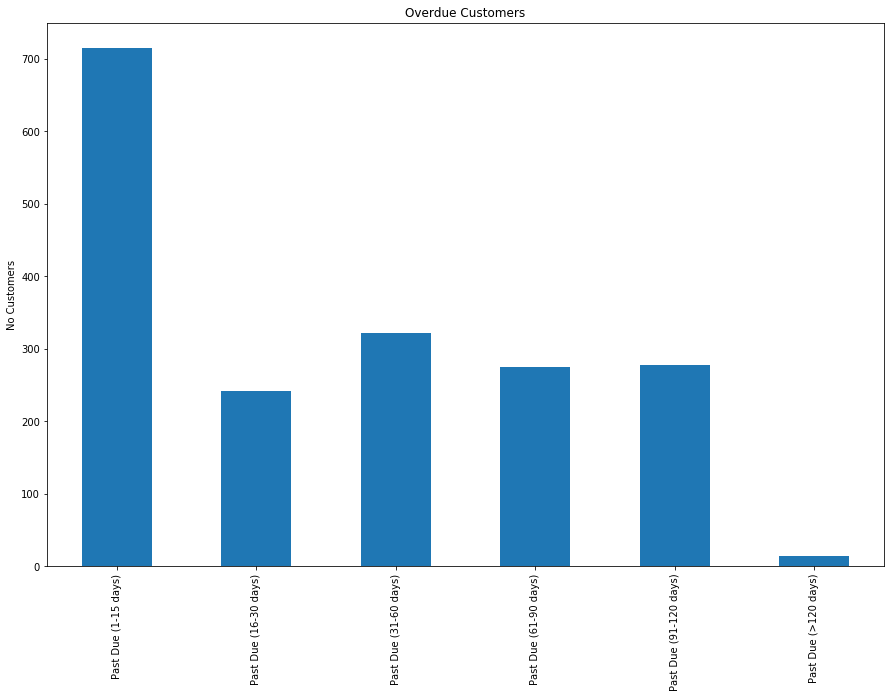

In [37]:
loan_status.value_counts()[-6:].plot(kind="bar", figsize=(15, 10));
plt.title("Overdue Customers");
plt.ylabel("No Customers");

## Company Rating Behavior

Prosper company tends to create a Gaussian distribution while rating it's customers. It's a valid assumption that ratings of the customers would fit a Gaussian distribution while scoring as the majority of them will tend to be within middle range. A similar approach is being taken with scoring of university exams.

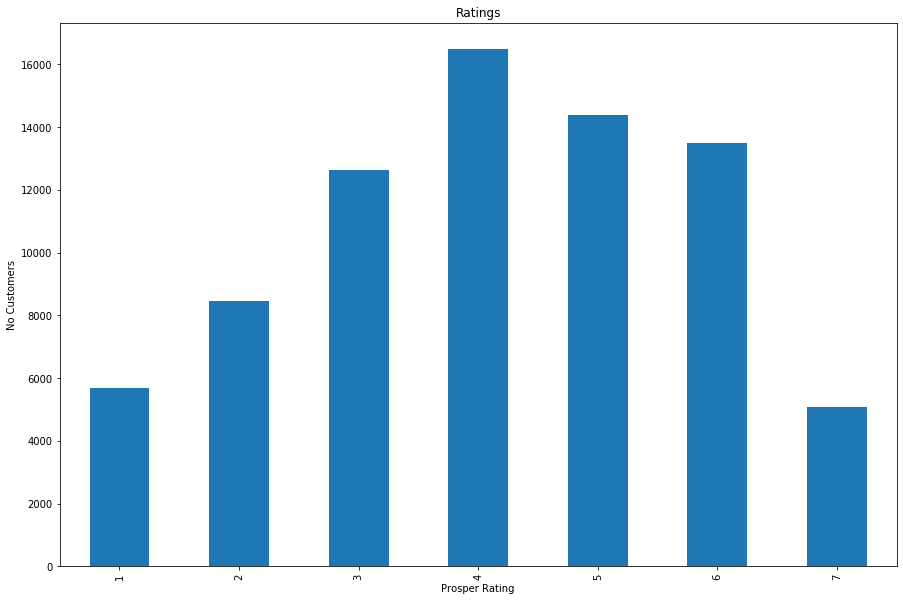

In [38]:
df["ProsperRating (numeric)"].value_counts().sort_index().plot(kind="bar", figsize=(15, 10));
plt.title("Ratings");
plt.ylabel("No Customers");
plt.xlabel("Prosper Rating");

## How APR is being decided?

Company tends to determine APR levels of customers with the rating levels.

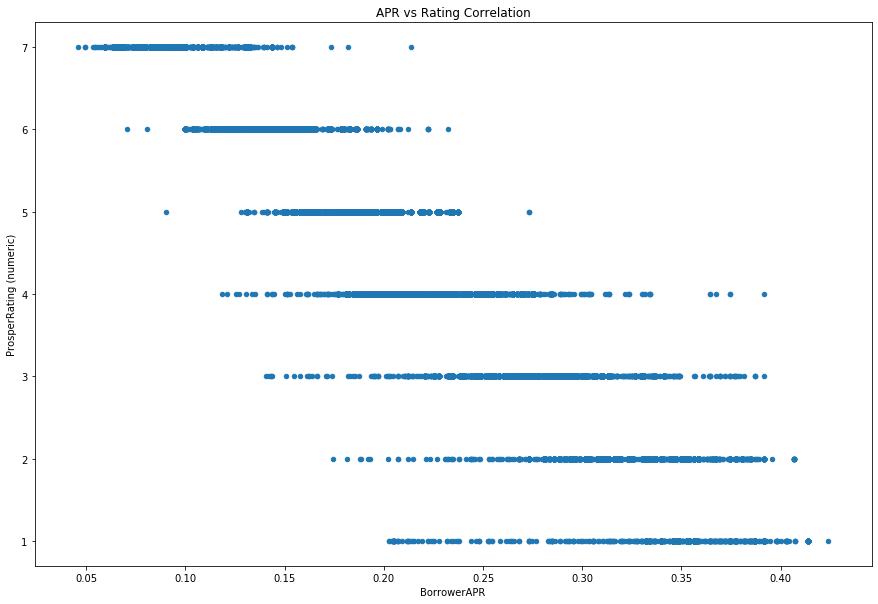

In [39]:
df.plot(kind="scatter", x="BorrowerAPR", y="ProsperRating (numeric)", figsize=(15, 10));
plt.title("APR vs Rating Correlation");

## House ownership affects ratings

House ownership appears to be an indicator of trustworthyness. 

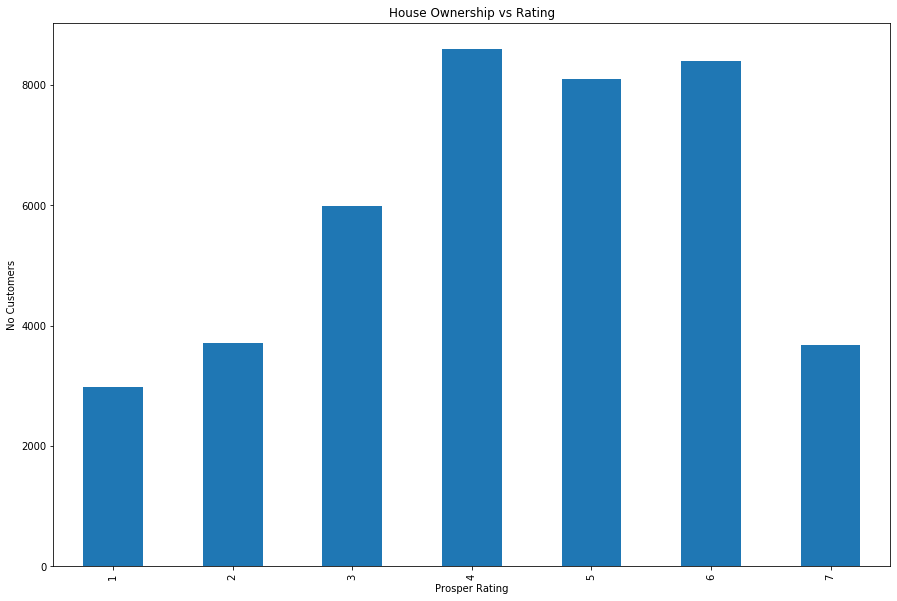

In [40]:
df[df.IsBorrowerHomeowner]["ProsperRating (numeric)"].value_counts().sort_index().plot(kind="bar", figsize=(15, 10))
plt.title("House Ownership vs Rating");
plt.ylabel("No Customers");
plt.xlabel("Prosper Rating");

## Income is related a lot!

Yearly income is a solid indicator for if a trustworthy loan procedure, and enhances the ratings.

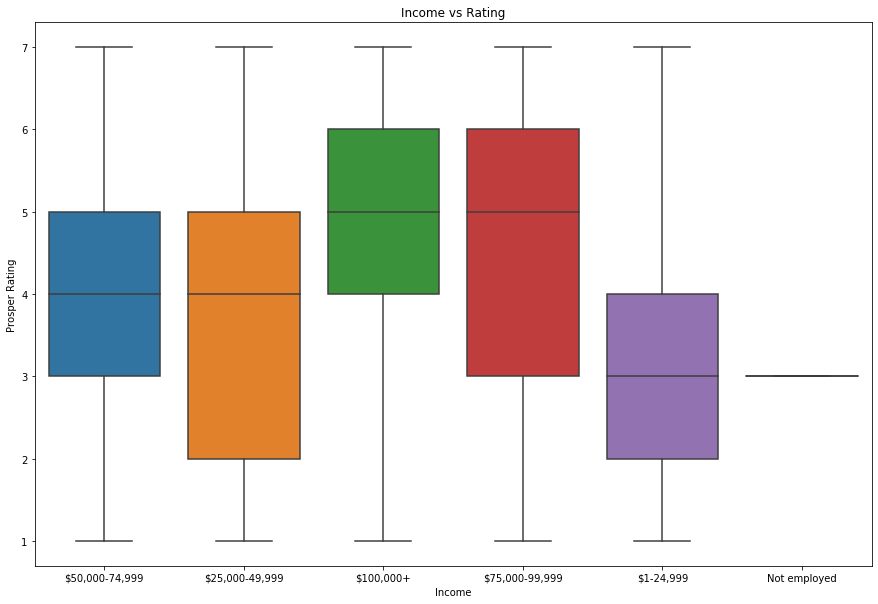

In [41]:
fig, ax = plt.subplots(figsize=(15,10))
sb.boxplot(data = df, x="IncomeRange", y="ProsperRating (numeric)", ax=ax);
plt.title("Income vs Rating");
plt.ylabel("Prosper Rating");
plt.xlabel("Income");

## Income Verifiability adds an extra layer of trustworthyness

Apart from the statement of income, verifiability of income adds an extra layer which may yield to better rating.

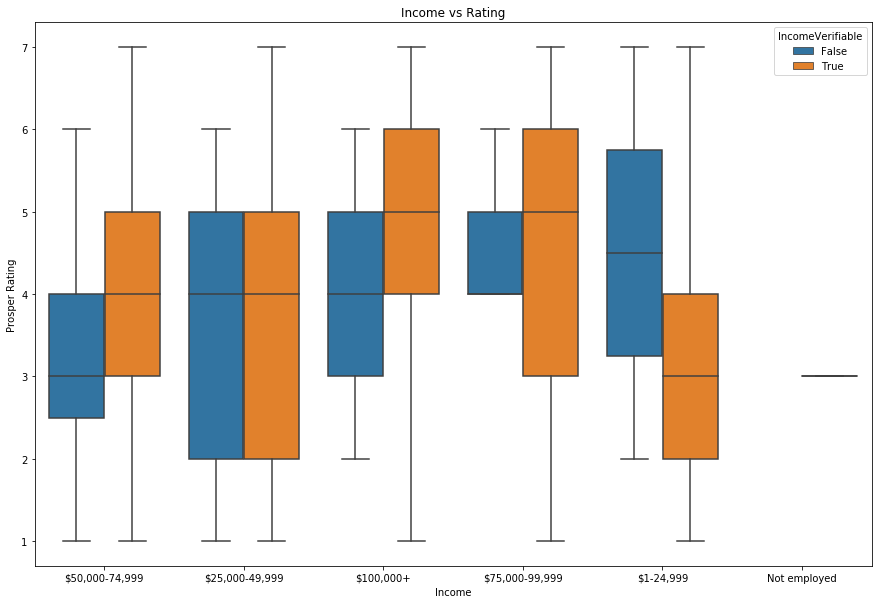

In [42]:
fig, ax = plt.subplots(figsize=(15,10))
sb.boxplot(data = df, x="IncomeRange", y="ProsperRating (numeric)", hue="IncomeVerifiable", ax=ax);
plt.title("Income vs Rating");
plt.ylabel("Prosper Rating");
plt.xlabel("Income");

## Which customers tend to overdue (1)

If we want see how this extra layer of verifiable income we find out following information:
- Company verifies all of it's customers incomes within loan completion
- Prosper rating system tends to be a succesful metrics to evaluate customers.

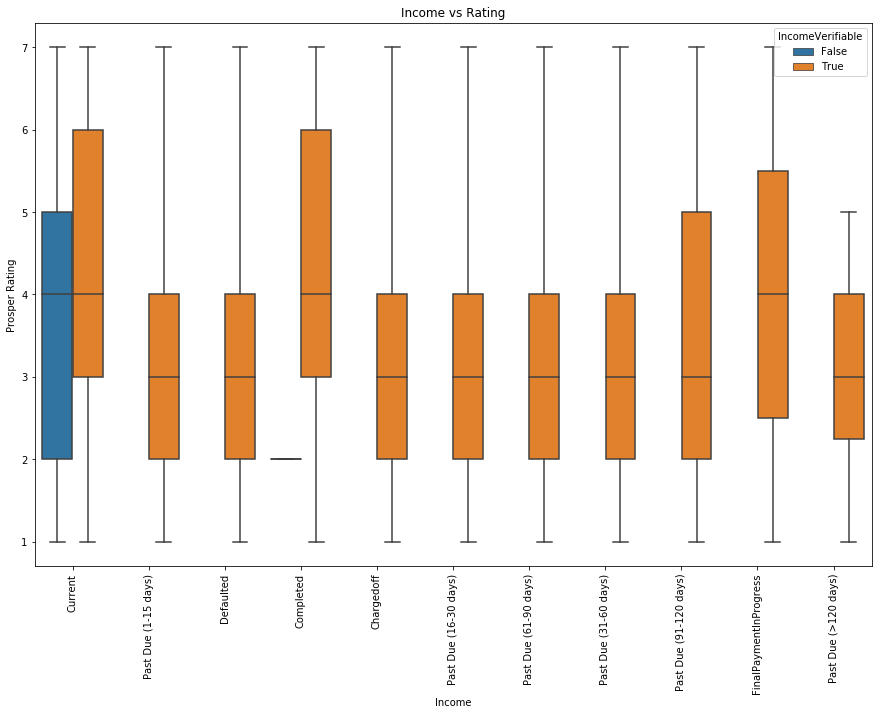

In [43]:
fig, ax = plt.subplots(figsize=(15,10))
chart = sb.boxplot(data = df, y="ProsperRating (numeric)", x="LoanStatus", hue="IncomeVerifiable", ax=ax)
chart.set_xticklabels(chart.get_xticklabels(), rotation=90)
plt.title("Income vs Rating");
plt.ylabel("Prosper Rating");
plt.xlabel("Income");

## Which customers tend to overdue (2)

We found out house ownership might give us better higher ratings. Apperantly, this does not work quite well.

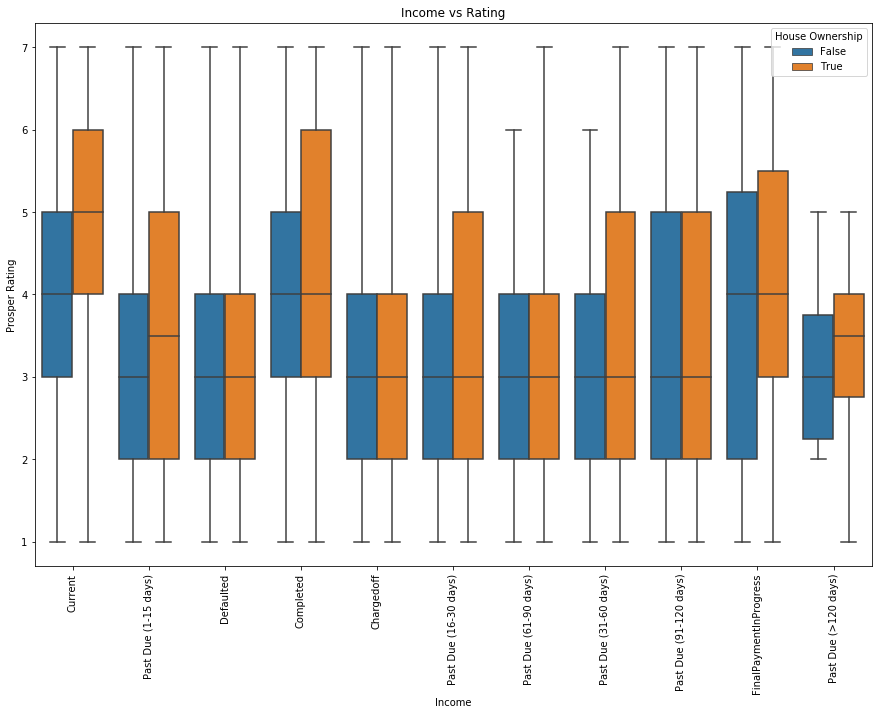

In [45]:
fig, ax = plt.subplots(figsize=(15,10))
chart = sb.boxplot(data = df, y="ProsperRating (numeric)", x="LoanStatus", hue="IsBorrowerHomeowner", ax=ax)
chart.set_xticklabels(chart.get_xticklabels(), rotation=90)
plt.title("Income vs Rating");
plt.ylabel("Prosper Rating");
plt.xlabel("Income");
plt.legend(title = "House Ownership", loc="upper right");

> Once you're ready to finish your presentation, check your output by using
nbconvert to export the notebook and set up a server for the slides. From the
terminal or command line, use the following expression:
> > `jupyter nbconvert <file_name>.ipynb --to slides --post serve --template output_toggle`

> This should open a tab in your web browser where you can scroll through your
presentation. Sub-slides can be accessed by pressing 'down' when viewing its parent
slide. Make sure you remove all of the quote-formatted guide notes like this one
before you finish your presentation!